# Project 2 
**Group B** \
Students: Elodie-Angélique Lendi, Mridhula Jayasankar, Clarice Jasmine Mihalache



### Question 1

AiiDalab is a web platform that allows us to do computational science in both the chemical field and the material science field. On this platform, instead of writting all the code for some calculations we can use what AiiDalab calls "reads-made apps" for running simulations and even analysing the results. In addition, it also makes working with collaborators easier. 

AiiDalab offers three different types of calculations for adsorption studies: 
1. It helps in providing workflows to run geometry optimization. Hence, it finds the lowest energy configuration for the adsorbate-system. 
2. Adosorption energy can also be determined. 
3. Provides an overview into the interaction mechanism between the adsorbate and the surface. 

However it does not give an insight on the electronic structure which is given by the DFT calcultations. 

In the app downnloaded during the class, LSMO, the platform gives access to three calcultations: 
1. Gemoetry optimization and charges - 
2. Pore analysis - 
3. Isotherm calculations - 


### Question 5 

The aim of this question is to use pyIAST to model binary-mixture isotherms by the linear interpolation method for a pressure range from 0.1 to 4.0 using increments of 0.2. This allows us to plot the results and ...


In [67]:
import pyiast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def binary_mixture(y_CH4: float, y_CO2: float):

    df_CH4 = pd.read_csv("CH4_IRMOF1.csv")
    df_CO2 = pd.read_csv("CO2_IRMOF1.csv")

    CO2_isotherm = pyiast.InterpolatorIsotherm(df_CO2, loading_key="Loading(mmol/g)", pressure_key="Pressure(bar)", fill_value="extrapolate")
    CH4_isotherm = pyiast.InterpolatorIsotherm(df_CH4, loading_key="Loading(mmol/g)", pressure_key="Pressure(bar)", fill_value="extrapolate")
    
    # Pressure range for this simulation
    p_range = np.arange(0.1, 4.1, 0.2)
    
    # Introduction of a binary mixture
    y = [y_CH4, y_CO2]
    
    # Store results
    CO2_ads = []
    CH4_ads = []

    for p in p_range:
        # Partial pressure
        p_CO2 = p*y_CO2
        p_CH4 = p*y_CH4
        results = pyiast.iast([p_CO2, p_CH4], [CO2_isotherm, CH4_isotherm])
        CO2_ads.append(results[0])
        CH4_ads.append(results[1])

    # Plotting graph

    plt.figure(figsize=(8,6))
    plt.plot(p_range, CO2_ads, marker= ".", markersize = 5, linewidth = 0.3, label = "CO2 uptake", color = "darkblue")
    plt.plot(p_range, CH4_ads, marker = "x", markersize = 5, linewidth = 0.3, label = " CH4 uptake", color = "darkgreen")
    plt.xlabel("Pressure [bar]")
    plt.ylabel("Uptake [mmol/g]")
    plt.title(f"Binary mixture adsorption isoterms {y_CH4}/{y_CO2} (CH4/CO2)")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
df_CH4 = pd.read_csv("CH4_IRMOF1.csv")
df_CO2 = pd.read_csv("CO2_IRMOF1.csv")

CH4_isotherm = pyiast.InterpolatorIsotherm(df_CH4, loading_key="Loading(mmol/g)", pressure_key="Pressure(bar)")
CO2_isotherm = pyiast.InterpolatorIsotherm(df_CO2, loading_key="Loading(mmol/g)", pressure_key="Pressure(bar)")

y=[0.1,0.9]
p=3.8
pyiast.iast([y[0]*p, y[1]*p], [CO2_isotherm, CH4_isotherm])

array([0.21282134, 0.40670248])

                      Component 1: p^0 = 10.181733 > 10.100000, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.
                      Component 1: p^0 = 10.779832 > 10.100000, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.
                      Component 1: p^0 = 11.392590 > 10.100000, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.


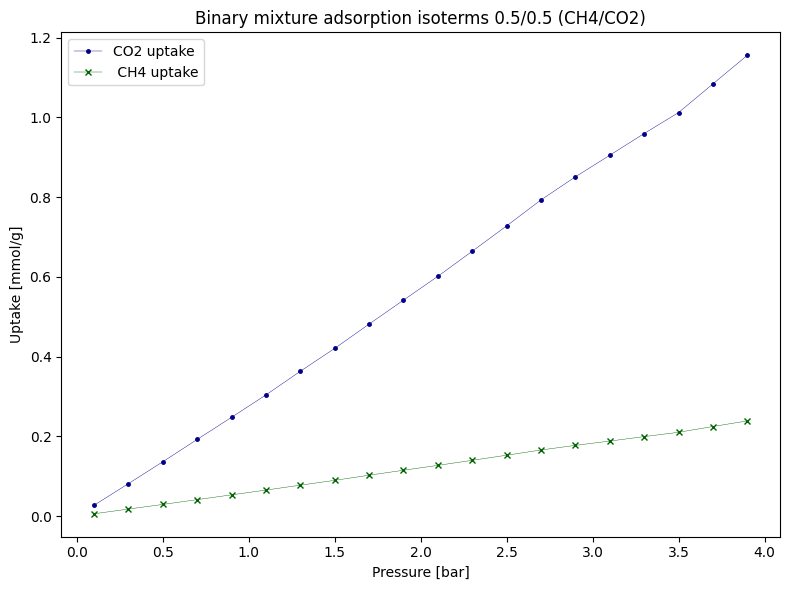

In [68]:
binary_mixture(0.5, 0.5)